<a href="https://colab.research.google.com/github/fboldt/aulasml/blob/master/aula1a_regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [2]:
data['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [3]:
data['data'][:10,:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665608,  0.01219057],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187239,  0.00393485],
       [-0.09269548, -0.04464164, -0.04069594, -0.01944183, -0.06899065],
       [-0.04547248,  0.05068012, -0.04716281, -0.01599898, -0.04009564],
       [ 0.06350368,  0.05068012, -0.00189471,  0.06662945,  0.09061988],
       [ 0.04170844,  0.05068012,  0.06169621, -0.04009893, -0.01395254],
       [-0.07090025, -0.04464164,  0.03906215, -0.03321323, -0.01257658]])

In [4]:
data['target'][:10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

In [5]:
X, y = data['data'], data['target']
X.shape, y.shape

((442, 10), (442,))

2


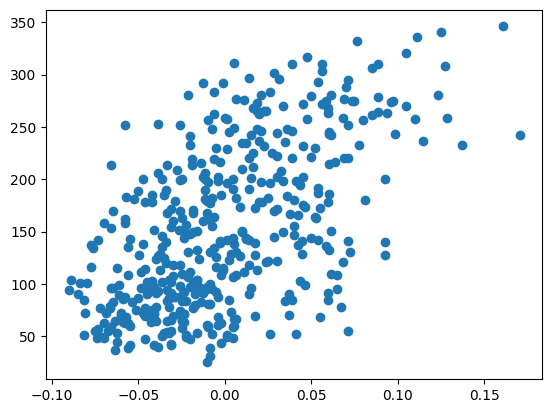

In [6]:
import matplotlib.pyplot as plt
for i in [2]: #range(X.shape[1]):
  print(i)
  plt.scatter(X[:,i], y)
  plt.show()

In [7]:
X[:,2].shape, X[:,2:3].shape

((442,), (442, 1))

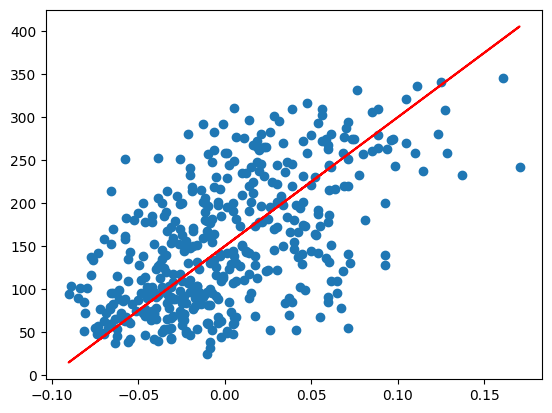

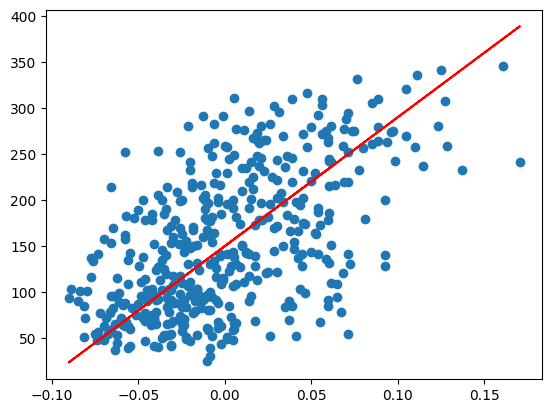

In [8]:
X2 = X[:,2:3]
def modelo_linear(X, a, b):
  y = a*X + b
  return y
ypred = modelo_linear(X2, 1500, 150)
plt.scatter(X2, y)
plt.plot(X2, ypred, 'r')
plt.show()
ypred = modelo_linear(X2, 1400, 150)
plt.scatter(X2, y)
plt.plot(X2, ypred, 'r')
plt.show()

In [9]:
ypred.shape, y.shape

((442, 1), (442,))

In [10]:
# mean absolute error
def mae(y, ypred):
  ydiff = ypred - y.reshape(-1,1)
  yabs = abs(ydiff)
  sumerror = sum(yabs)
  mae = sumerror/len(yabs)
  return mae
mae(y, modelo_linear(X2, 1500, 150)), mae(y, modelo_linear(X2, 1400, 150))

(array([53.93453917]), array([52.6946261]))

In [11]:
# mean squared error
def mse(y, ypred):
  ydiff = ypred - y.reshape(-1,1)
  ydiffsquare = ydiff**2
  sumerror = sum(ydiffsquare)
  mse = sumerror/len(ydiffsquare)
  return mse
mse(y, modelo_linear(X2, 1500, 150)), mse(y, modelo_linear(X2, 1400, 150))

(array([4580.80366255]), array([4354.30378037]))

In [12]:
from math import sqrt
# root mean squared error
def rmse(y, ypred):
  rmse = sqrt(mse(y, ypred))
  return rmse
rmse(y, modelo_linear(X2, 1500, 150)), rmse(y, modelo_linear(X2, 1400, 150))

(67.68163460313129, 65.98714860010703)

In [13]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, modelo_linear(X2, 1500, 150)), mean_squared_error(y, modelo_linear(X2, 1400, 150))

(4580.803662551777, 4354.303780372608)

In [14]:
mean_squared_error(y, modelo_linear(X2, 0, 0))

29074.481900452487

In [91]:
import numpy as np

def addBias(X):
  bias  = np.ones((X.shape[0], 1))
  X_b = np.concatenate((bias, X), axis=1)
  return X_b

class regressao_linear():
  def fit(self, X, y):
    X_b = addBias(X)
    self.w = np.random.uniform(size=(X_b.shape[1],1))
    for _ in range(5000):
      ypred = X_b.dot(self.w)
      erros = ypred - y.reshape(-1, 1)
      ajuste = X_b.T @ erros
      lr = 1 / len(y)
      self.w = self.w - lr * ajuste

  def predict(self, X):
    X_b = addBias(X)
    y = X_b.dot(self.w)
    return y

modelo = regressao_linear()
modelo.fit(X2, y)
mean_squared_error(y, modelo.predict(X2))

3890.456585757804

In [16]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(X2, y)
mean_squared_error(y, modelo.predict(X2))

3890.456585461273

In [17]:
modelo.coef_, modelo.intercept_

(array([949.43526038]), 152.13348416289617)

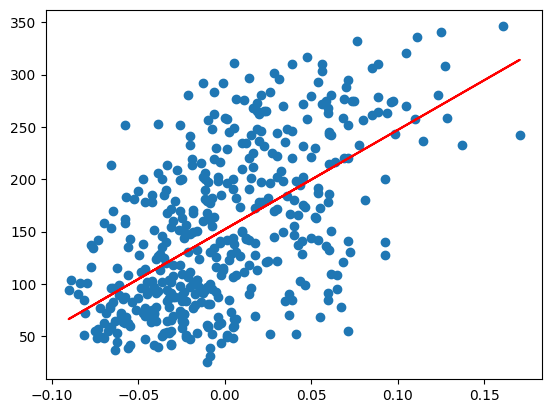

In [18]:
ypred = modelo.predict(X2)
plt.scatter(X2, y)
plt.plot(X2, ypred, 'r')
plt.show()

In [19]:
import numpy as np

def addBias(X):
  bias  = np.ones((X.shape[0], 1))
  X_b = np.concatenate((bias, X), axis=1)
  return X_b

class regressao_linear():
  def fit(self, X, y):
    X_b = addBias(X)
    self.w = np.linalg.pinv(X_b).dot(y.reshape(-1,1))

  def predict(self, X):
    X_b = addBias(X)
    y = X_b.dot(self.w)
    return y

modelo = regressao_linear()
modelo.fit(X2, y)
mean_squared_error(y, modelo.predict(X2))

3890.4565854612724

In [20]:
modelo = LinearRegression()
modelo.fit(X, y)
mean_squared_error(y, modelo.predict(X))

2859.69634758675

In [21]:
from sklearn.neighbors import KNeighborsRegressor
modelo = KNeighborsRegressor(n_neighbors=1)
modelo.fit(X, y)
mean_squared_error(y, modelo.predict(X))

0.0

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.5,
                                                    random_state=42)
modelo = KNeighborsRegressor(n_neighbors=1)
modelo.fit(X_train, y_train)
mean_squared_error(y_test, modelo.predict(X_test))

6438.226244343891

In [23]:
modelo = KNeighborsRegressor()
modelo.fit(X_train, y_train)
mean_squared_error(y_test, modelo.predict(X_test))

3814.547330316742

In [24]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)
mean_squared_error(y_test, modelo.predict(X_test))

2978.5983281357217

In [25]:
from sklearn.ensemble import RandomForestRegressor
modelo = RandomForestRegressor()
modelo.fit(X_train, y_train)
mean_squared_error(y_test, modelo.predict(X_test))

3265.506653846154